In [30]:
%load_ext autoreload
%autoreload 2

import sys

sys.path.insert(0, "../src")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here we're going to figure out why some of the aruco tags are not being detected.

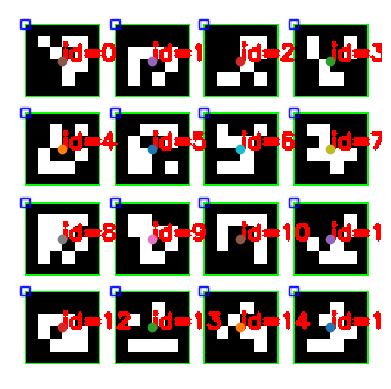

In [33]:
import cv2 as cv
import matplotlib.pyplot as plt
import tempfile
from pathlib import Path

from camera import (
    move_camera_pos,
    get_camera_image_rgb,
    get_camera_image_depth,
    draw_aruco_grid,
    extract_aruco_tags,
    draw_aruco_tags,
)
import rospy

# generate aruco markers for testing
draw_aruco_grid(4, 4, figsize=(3, 3))
temp_path = Path(tempfile.mkdtemp()) / "aruco_markers.png"
plt.savefig(temp_path, bbox_inches="tight")
plt.close()

rgb = cv.imread(str(temp_path))
frame_markers, corners, ids = extract_aruco_tags(rgb)
draw_aruco_tags(frame_markers, corners, ids)
plt.show()

In [34]:
draw_aruco_grid(4, 4, figsize=(10, 10))
plt.savefig(
    "../models/tabletop_aruco_test/materials/textures/grid.png",
    bbox_inches="tight",
)
plt.close()

It turns out the reason that the aruco tags are not being detected is because the border around the tags are missing.
We need to introduce a white border for the corner detection to work properly.

Now lets parse this from the gazebo scene.

```bash
roslaunch visman_learning_adventure tabletop_aruco_test.launch
```

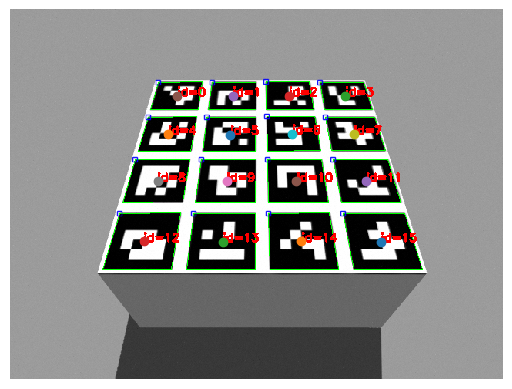

In [35]:
rospy.init_node("camera_test")
move_camera_pos(-1, 0, 1.5, pitch=0.9)
rgb = get_camera_image_rgb()

frame_markers, corners, ids = extract_aruco_tags(rgb)
draw_aruco_tags(frame_markers, corners, ids)
plt.show()